In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [376]:
data = pd.read_csv('adult_data.csv')

In [377]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [378]:
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [379]:
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 salary            object
dtype: object

In [380]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [381]:
data.columns = ['age', ' workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [382]:
data['capital_gain']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_gain, Length: 32561, dtype: int64

In [383]:
def handling_data(data):
    data['capital_gain'] = np.where(data['capital_gain'] == 0, np.nan, data['capital_gain'])
    data['capital_gain'] = np.log(data['capital_gain'])
    data['capital_gain'] = data['capital_gain'].replace(np.nan, 0)

In [384]:
handling_data(data)

In [385]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


In [386]:
data['capital_gain'].dtypes

dtype('float64')

C:\Users\shaik\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


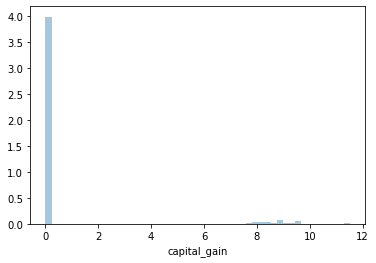

In [387]:
sns.distplot(data['capital_gain'])

In [388]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [389]:
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [390]:
# removing outliers

data.dtypes

age                 int64
 workclass         object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss        int64
hours_per_week      int64
native_country     object
salary             object
dtype: object

In [391]:
def handling_loss_data(data):
    data['capital_loss'] = np.where(data['capital_loss'] == 0, np.nan, data['capital_loss'])
    data['capital_loss'] = np.log(data['capital_loss'])
    data['capital_loss'] = data['capital_loss'].replace(np.nan, 0)

In [392]:
handling_loss_data(data)

In [393]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,<=50K


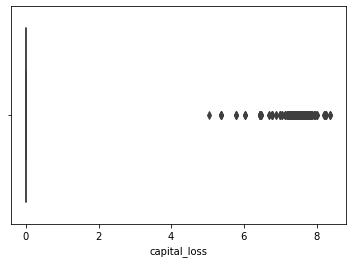

In [394]:
sns.boxplot(data['capital_loss'])

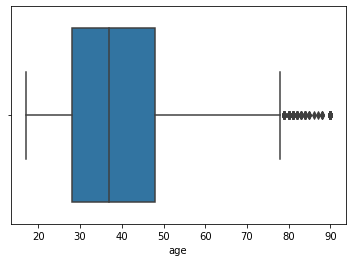

In [395]:
sns.boxplot(data['age'])

In [396]:
columns = ['capital_gain', 'capital_loss', 'education_num', 'hours_per_week']

# def outliers(columns):
#     IQR = data[i]
def outliers(data):
    for i in columns:
        IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
        lower_range = data[i].quantile(0.25) - (1.5 * IQR)
        upper_range = data[i].quantile(0.75) + (1.5 * IQR)

        data.loc[data[i] <= lower_range, i] = lower_range
        data.loc[data[i] >= upper_range, i] = upper_range

In [397]:
outliers(data)

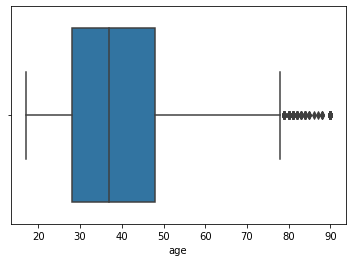

In [398]:
sns.boxplot(data['age'])

In [399]:
from sklearn import preprocessing

columns = ['relationship', 'race', 'marital_status', 'education']

def giving_labels(data):
    
    label = preprocessing.LabelEncoder()
    
    for i in columns:
        
        data[i] = label.fit_transform(data[i])


In [400]:
giving_labels(data)

In [401]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,9,13.0,4,Adm-clerical,1,4,Male,0.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,9,13.0,2,Exec-managerial,0,4,Male,0.0,0.0,32.5,United-States,<=50K
2,38,Private,215646,11,9.0,0,Handlers-cleaners,1,4,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,1,7.0,2,Handlers-cleaners,0,2,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,9,13.0,2,Prof-specialty,5,2,Female,0.0,0.0,40.0,Cuba,<=50K


In [402]:
data['sex'] = np.where(data['sex'] == " Male", 1, 0)
# df['sex'] = np.where(df['sex'] == " Male", 1, 0)

In [403]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,9,13.0,4,Adm-clerical,1,4,1,0.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,9,13.0,2,Exec-managerial,0,4,1,0.0,0.0,32.5,United-States,<=50K
2,38,Private,215646,11,9.0,0,Handlers-cleaners,1,4,1,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,1,7.0,2,Handlers-cleaners,0,2,1,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,9,13.0,2,Prof-specialty,5,2,0,0.0,0.0,40.0,Cuba,<=50K


In [404]:
data[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [405]:
columns = [' workclass', 'occupation', 'native_country']

def replace_missing(data):
    for i in columns:

        data[i] = np.where(data[i] == ' ?', 'Missing', data[i])
        label_enco = {value: key for key, value in enumerate(data[i].unique())}
        data[i] = data[i].map(label_enco)

In [406]:
replace_missing(data)

In [407]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,9,13.0,4,0,1,4,1,0.0,0.0,40.0,0,<=50K
1,50,1,83311,9,13.0,2,1,0,4,1,0.0,0.0,32.5,0,<=50K
2,38,2,215646,11,9.0,0,2,1,4,1,0.0,0.0,40.0,0,<=50K
3,53,2,234721,1,7.0,2,2,0,2,1,0.0,0.0,40.0,0,<=50K
4,28,2,338409,9,13.0,2,3,5,2,0,0.0,0.0,40.0,1,<=50K


In [408]:
data = data.drop(['fnlwgt'], axis = 1)

In [409]:
data.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [410]:
data['salary'] = np.where(data['salary'] == " >50K", 1,0)

In [411]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,9,13.0,4,0,1,4,1,0.0,0.0,40.0,0,0
1,50,1,9,13.0,2,1,0,4,1,0.0,0.0,32.5,0,0
2,38,2,11,9.0,0,2,1,4,1,0.0,0.0,40.0,0,0
3,53,2,1,7.0,2,2,0,2,1,0.0,0.0,40.0,0,0
4,28,2,9,13.0,2,3,5,2,0,0.0,0.0,40.0,1,0


In [412]:
data.dtypes

age                 int64
 workclass          int64
education           int32
education_num     float64
marital_status      int32
occupation          int64
relationship        int32
race                int32
sex                 int32
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country      int64
salary              int32
dtype: object

In [413]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [429]:
sc = StandardScaler()

In [420]:
X = data[['age', ' workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [421]:
X

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,0,9,13.0,4,0,1,4,1,0.0,0.0,40.0,0
1,50,1,9,13.0,2,1,0,4,1,0.0,0.0,32.5,0
2,38,2,11,9.0,0,2,1,4,1,0.0,0.0,40.0,0
3,53,2,1,7.0,2,2,0,2,1,0.0,0.0,40.0,0
4,28,2,9,13.0,2,3,5,2,0,0.0,0.0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12.0,2,10,5,4,0,0.0,0.0,38.0,0
32557,40,2,11,9.0,2,9,0,4,1,0.0,0.0,40.0,0
32558,58,2,11,9.0,6,0,4,4,0,0.0,0.0,40.0,0
32559,22,2,11,9.0,4,0,3,4,1,0.0,0.0,32.5,0


In [422]:
y = data['salary']

In [423]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

In [424]:
y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [430]:
X = sc.fit_transform(X)

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [432]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (26048, 13)
Test data shape: (6513, 13)


In [433]:
from sklearn.linear_model import LogisticRegression

In [434]:
model = LogisticRegression()

In [435]:
model.fit(X_train, y_train)

LogisticRegression()

In [436]:
y_pred = model.predict(X_test)

In [437]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [438]:
pd.DataFrame(result)

,Actual,Predicted
14160,0,0
27048,0,0
28868,1,1
5667,0,0
7827,0,0
...,...,...
1338,0,0
24534,1,0
18080,1,1
10354,0,0


In [439]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [440]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8100721633655765
Confusion Matrix:
 [[4619  323]
 [ 914  657]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4942
           1       0.67      0.42      0.52      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.68      0.70      6513
weighted avg       0.80      0.81      0.79      6513

